In [3]:
'''This file contains the code and results for the multiclass classification movie revenue prediction problem'''

# Pull in raw dataset to coding environment utilizing pandas to read the csv, provide a dataframe structure and add correspoding attribute labels:

import pandas as pd
from pandas.core.ops.array_ops import isna
import os

# Raw dataset is stored in Google Drive. Mounted google drive to access original IMDB dataset:
movies = pd.read_csv('/content/drive/MyDrive/820/21Jan2023- 820- Movie metadata.csv')
movies = pd.DataFrame(data = movies)

col_names = ["Color", "Director Name", "# Critic Reviews", "Duration", "# Director Likes", "# Actor 1 Likes", "Actor 2 Name", "# Actor 1 Likes", "Gross", "Genres", 
             "Actor 1 Name", "Movie Title", "# Users Voted", "# Cast Likes", "Actor 3 Name", "# FB Poster", "Plot Keywords", "Movie Link", "# Users for Reviews", "Langauge", "Country",
             "Content Rating", "Budget", "Title Year", "# Actor 2 Likes", "IMDB Score", "Aspect Ratio", "# Movie Likes"]
movies.columns = col_names


In [37]:
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 1 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Langauge,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Action|Adventure|Sci-Fi,...,738.00,English,USA,PG-13,263700000.00,2012.00,632.00,6.60,2.35,24000


In [38]:
# Display raw data information prior to removing missing data:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color                3756 non-null   object 
 1   Director Name        3756 non-null   object 
 2   # Critic Reviews     3756 non-null   float64
 3   Duration             3756 non-null   float64
 4   # Director Likes     3756 non-null   float64
 5   # Actor 1 Likes      3756 non-null   float64
 6   Actor 2 Name         3756 non-null   object 
 7   # Actor 1 Likes      3756 non-null   float64
 8   Gross                3756 non-null   float64
 9   Genres               3756 non-null   object 
 10  Actor 1 Name         3756 non-null   object 
 11  Movie Title          3756 non-null   object 
 12  # Users Voted        3756 non-null   int64  
 13  # Cast Likes         3756 non-null   int64  
 14  Actor 3 Name         3756 non-null   object 
 15  # FB Poster          3756 non-null   f

In [39]:
# Remove all movies that contain missing data and display information about new dataset:
movies = movies.dropna()
pd.set_option('float_format', '{:.2f}'.format)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Color                3756 non-null   object 
 1   Director Name        3756 non-null   object 
 2   # Critic Reviews     3756 non-null   float64
 3   Duration             3756 non-null   float64
 4   # Director Likes     3756 non-null   float64
 5   # Actor 1 Likes      3756 non-null   float64
 6   Actor 2 Name         3756 non-null   object 
 7   # Actor 1 Likes      3756 non-null   float64
 8   Gross                3756 non-null   float64
 9   Genres               3756 non-null   object 
 10  Actor 1 Name         3756 non-null   object 
 11  Movie Title          3756 non-null   object 
 12  # Users Voted        3756 non-null   int64  
 13  # Cast Likes         3756 non-null   int64  
 14  Actor 3 Name         3756 non-null   object 
 15  # FB Poster          3756 non-null   f

In [40]:
# Display statistical measures for each numerical attribute on the cleaned dataset:
movies.describe()

,# Critic Reviews,Duration,# Director Likes,# Actor 1 Likes,# Actor 1 Likes,Gross,# Users Voted,# Cast Likes,# FB Poster,# Users for Reviews,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
count,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00
mean,167.38,110.26,807.34,771.28,7751.34,52612824.24,105826.73,11527.10,1.38,336.84,46236849.64,2002.98,2021.78,6.47,2.11,9353.83
std,123.45,22.65,3068.17,1894.25,15519.34,70317866.91,152035.40,19122.18,2.04,411.23,226010288.48,9.89,4544.91,1.06,0.35,21462.89
min,2.00,37.00,0.00,0.00,0.00,162.00,91.00,0.00,0.00,4.00,218.00,1927.00,0.00,1.60,1.18,0.00
25%,77.00,96.00,11.00,194.00,745.00,8270232.75,19667.00,1919.75,0.00,110.00,10000000.00,1999.00,384.75,5.90,1.85,0.00
50%,138.50,106.00,64.00,436.00,1000.00,30093107.00,53973.50,4059.50,1.00,210.00,25000000.00,2004.00,685.50,6.60,2.35,227.00
75%,224.00,120.00,235.00,691.00,13000.00,66881940.75,128602.00,16240.00,2.00,398.25,50000000.00,2010.00,976.00,7.20,2.35,11000.00
max,813.00,330.00,23000.00,23000.00,640000.00,760505847.00,1689764.00,656730.00,43.00,5060.00,12215500000.00,2016.00,137000.00,9.30,16.00,349000.00


In [41]:
# Provide visualization tools to aid in understanding the features utilizing plotly packages.

import plotly.express as px

# Box & Whisker for the number of Critic Reviews registered:
bw_Critics = px.box(movies['# Critic Reviews'])
bw_Critics

In [12]:
# Box & Whisker for the length of the movie:
bw_Duration = px.box(movies['Duration'])
bw_Duration

In [13]:
# Box & Whisker for the number of director likes on Facebook:
bw_Director = px.box(movies['# Director Likes'])
bw_Director

In [14]:
# Box & Whisker for the gross revenue in US dollars for each movie:
bw_Gross = px.box(movies['Gross'])
bw_Gross

In [15]:
# Box & Whisker for the number of users who registered a vote on IMDB:
bw_Users = px.box(movies['# Users Voted'])
bw_Users

In [17]:
# Box & Whisker for the number of Facbeook likes the cast has earned as a collective:
bw_Cast = px.box(movies['# Cast Likes'])
bw_Cast

In [ ]:
# Box & Whisker for the number of Facebook movie posters:
bw_Poster = px.box(movies['# FB Poster'])
bw_Poster

In [18]:
# Box & Whisker for the production budget (excluding marketing and promotional) in US dollars for each movie:
bw_Budget = px.box(movies['Budget'])
bw_Budget

In [19]:
# Box & Whisker for theIMDB scores that were submitted by users:
bw_IMDB = px.box(movies['IMDB Score'])
bw_IMDB

In [20]:
# Box & Whisker for the number of movie likes on Facebook:
bw_Likes = px.box(movies['# Movie Likes'])
bw_Likes

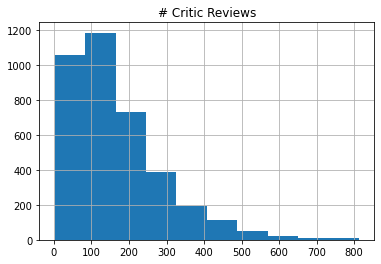

In [21]:
# Histogram displaying the distribution of the # of critic reviews registered:
hist_Critic = movies.hist('# Critic Reviews')

array([[<AxesSubplot:title={'center':'Duration'}>]], dtype=object)

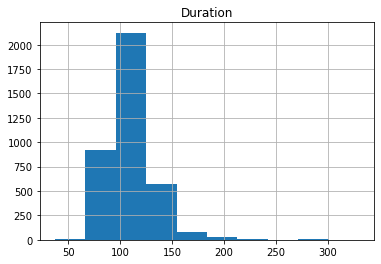

In [22]:
# Histograms displaying the distribution of the length/watch time/run time/duration of the movie:
hist_Duration = movies.hist('Duration')
hist_Duration

array([[<AxesSubplot:title={'center':'# Director Likes'}>]], dtype=object)

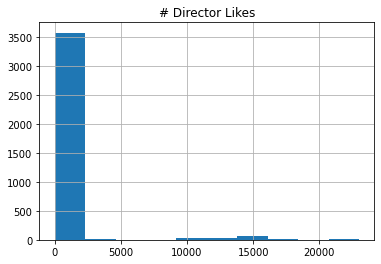

In [23]:
# Histogram showing the distrituion of the # of director likes on Facebook:
hist_Director = movies.hist('# Director Likes')
hist_Director

array([[<AxesSubplot:title={'center':'Gross'}>]], dtype=object)

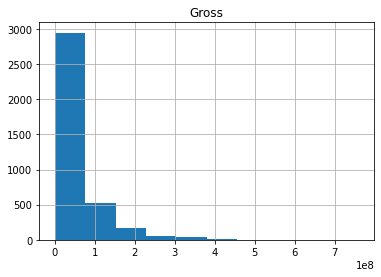

In [24]:
# Histrogram showing the distribution of the gross revenue variable:
hist_Gross = movies.hist('Gross')
hist_Gross

array([[<AxesSubplot:title={'center':'# Users Voted'}>]], dtype=object)

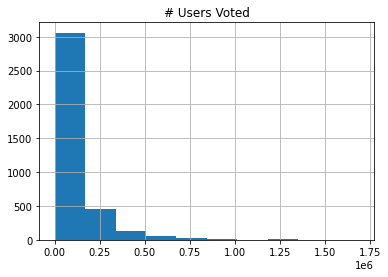

In [25]:
# Historgram showing the distribution of the number of users who registered a vote on IMDB:
hist_Users = movies.hist('# Users Voted')
hist_Users

array([[<AxesSubplot:title={'center':'# Cast Likes'}>]], dtype=object)

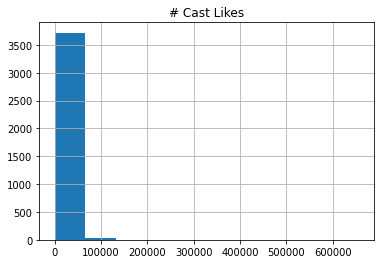

In [26]:
# Histogram showing the distribution of number of likes the cast has collectively on Facebook:
hist_Cast = movies.hist('# Cast Likes')
hist_Cast

array([[<AxesSubplot:title={'center':'Budget'}>]], dtype=object)

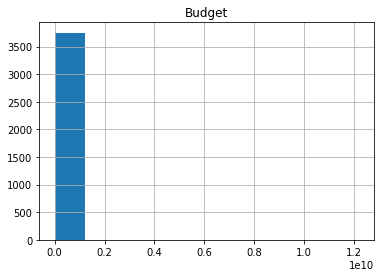

In [27]:

hist_Budget = movies.hist('Budget')
hist_Budget

array([[<AxesSubplot:title={'center':'IMDB Score'}>]], dtype=object)

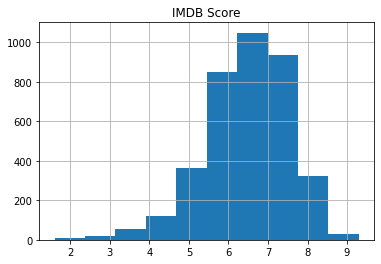

In [28]:
# Histogram showing the distribution of the IMDB Score variable:
hist_IMDB = movies.hist('IMDB Score')
hist_IMDB

array([[<AxesSubplot:title={'center':'# Movie Likes'}>]], dtype=object)

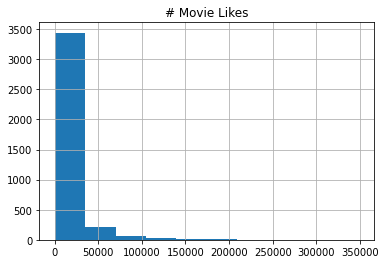

In [29]:
# Histogram showing the distribution of the number of movie likes on Facebook:
hist_Likes = movies.hist('# Movie Likes')
hist_Likes

Text(0.5, 0, 'Quantity')

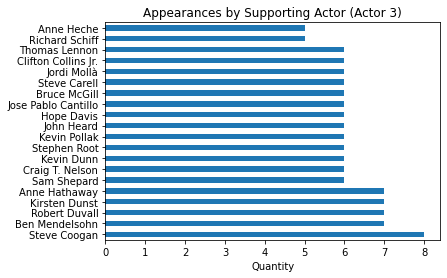

In [ ]:
# Utilize Matplotlib packages to display bar plots:

import matplotlib.pyplot as plt

# Bar plot showing the number of times the third actor appeared in the dataset for the top 20:
bar_Actor3 = movies['Actor 3 Name'].value_counts()[:20].plot(kind = 'barh')
plt.title("Appearances by Supporting Actor (Actor 3)")
plt.xlabel("Quantity")

<AxesSubplot:>

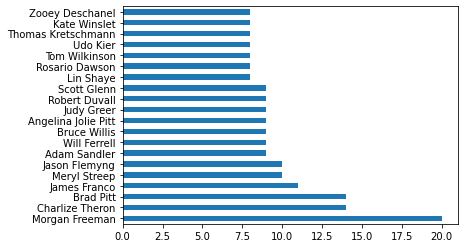

In [30]:
# Bar plot showing the number of times the second actor appeared in the dataset for the top 20:
bar_Actor2 = movies['Actor 2 Name'].value_counts()[:20].plot(kind = 'barh')
bar_Actor2

<AxesSubplot:>

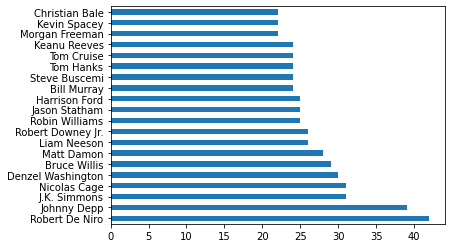

In [33]:
# Bar plot showing the number of times the first actor appeared in the dataset for the top 20:
bar_Actor1 = movies['Actor 1 Name'].value_counts()[:20].plot(kind = 'barh')
bar_Actor1

<AxesSubplot:>

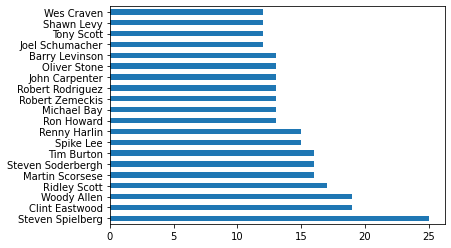

In [34]:
# Bar plot showing the number of times the director appeared in the dataset for the top 20:
bar_Director = movies['Director Name'].value_counts()[:20].plot(kind = 'barh')
bar_Director

<AxesSubplot:>

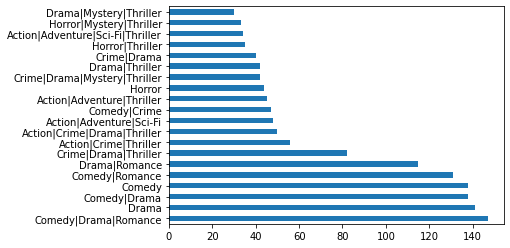

In [35]:
# Bar plot showing the number of times each genre appeared in the dataset for the top 20:
bar_Genre = movies['Genres'].value_counts()[:20].plot(kind = 'barh')
bar_Genre

<AxesSubplot:>

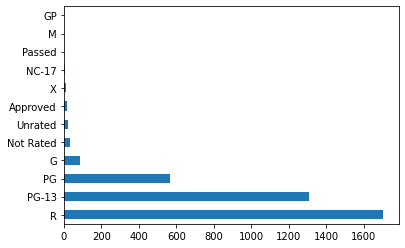

In [36]:
# Bar plot showing the number of times each content rating appeared in the dataset for the top 20:
bar_Rating = movies['Content Rating'].value_counts()[:20].plot(kind = 'barh')
bar_Rating

Class One      1692
Class Two      1463
Class Three     502
Class Four       93
Class Five        6
Name: Classes, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


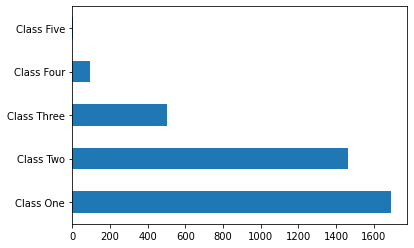

In [ ]:
from pandas.core.groupby.grouper import DataFrame

# Initialize gross revenue classes for our multi- class classification problem. 

'''Revenue Classes:
      $0 - 24.99M
      $25 - 99.99M
      $100 - 249.99M
      $250 - 499.99M
      $500M - 1000000000'''

#Assign each movie to a REVENUE CLASS:
x = pd.cut(movies.Gross, bins = [0, 24999999, 99999999,249999999, 499999999, 1000000000], 
       labels = ['Class One', 'Class Two', 'Class Three', 'Class Four', 'Class Five'])
movies['Classes'] = x

# Now that each movie has been labeled with the corresponding revenue category, count the number of each class that appears in the modified data:
class_Count = movies['Classes'].value_counts()
bar_class_Count = movies['Classes'].value_counts().plot(kind = 'barh')

# Display table and chart showing the relative quantities of each movie class:
print(class_Count)
print(bar_class_Count)